In [2]:
(X_Train,_),(_,_) = mnist.load_data()

In [3]:
print(X_Train.shape)

(60000, 28, 28)


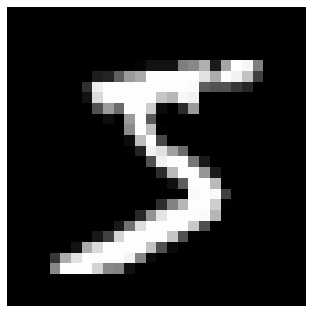

In [4]:
# Visualize
plt.style.use('seaborn')
plt.axis('off')
plt.imshow(X_Train[0],cmap='gray')
plt.show()

In [5]:
# Normalize this data - [-1,1]
#print(X_Train[0]) - btw 0-255 (int)

X_Train = (X_Train.astype('float32') - 127.5) / 127.5

print(np.min(X_Train))
print(np.max(X_Train))


-1.0
1.0


In [6]:
print(X_Train.shape)

(60000, 28, 28)


In [7]:
TOTAL_EPOCHS = 50
BATCH_SIZE = 256
NO_OF_BATCHES = int(X_Train.shape[0]/BATCH_SIZE) # 60000/256
HALF_BATCH = 128
NOISE_DIM = 100 # Upsample into 784 dim vector
adam = Adam(lr=2e-4,beta_1=0.5)

In [8]:
# Generator
# Input Noise (100 dim) and Outputs a vector (784 dim)

generator = Sequential()
generator.add(Dense(256,input_shape=(NOISE_DIM,)))
generator.add(LeakyReLU(0.2))
generator.add(Dense(512))
generator.add(LeakyReLU(0.2))
generator.add(Dense(1024))
generator.add(LeakyReLU(0.2))
generator.add(Dense(784, activation='tanh'))

generator.compile(loss='binary_crossentropy', optimizer=adam)
generator.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               25856     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 1024)              0         
_________________________________________

In [9]:
# Discriminator
# Input Img (784 dim) and Outputs a probability num (1 dim) - Downsampling

discriminator = Sequential()
discriminator.add(Dense(512,input_shape=(784,)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(1,activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy',optimizer=adam)
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_________________________________________________________________


In [10]:
# GAN 
discriminator.trainable = False
gan_input = Input(shape=(NOISE_DIM,))
generated_img = generator(gan_input)
gan_output = discriminator(generated_img)

# Functional API
model = Model(gan_input,gan_output)
model.compile(loss='binary_crossentropy',optimizer=adam)

In [11]:
X_Train = X_Train.reshape(-1,784)
print(X_Train.shape)

(60000, 784)


In [13]:
import os
os.mkdir('model')
os.mkdir('images')
os.listdir()

['.ipynb_checkpoints', 'images', 'MNIST_GAN.ipynb', 'model']

In [14]:
def save_images(epoch,samples=100):

  noise = np.random.normal(0,1,size=(samples,NOISE_DIM))
  generated_imgs = generator.predict(noise)
  generated_imgs = generated_imgs.reshape(samples,28,28)

  plt.figure(figsize=(10,10))

  for i in range(samples):
    plt.subplot(10,10,i+1)
    plt.imshow(generated_imgs[i],interpolation='nearest',cmap='gray')
    plt.axis('off')

  plt.tight_layout()
  plt.savefig('images/gan_output_epoch_{}.png'.format(epoch+1))
  plt.show()

Epoch= 1 , Discriminator Loss= 0.6489, Generator Loss= 0.9565
Epoch= 2 , Discriminator Loss= 0.6310, Generator Loss= 1.0702
Epoch= 3 , Discriminator Loss= 0.6316, Generator Loss= 1.1308
Epoch= 4 , Discriminator Loss= 0.6216, Generator Loss= 1.1550
Epoch= 5 , Discriminator Loss= 0.6001, Generator Loss= 1.2175


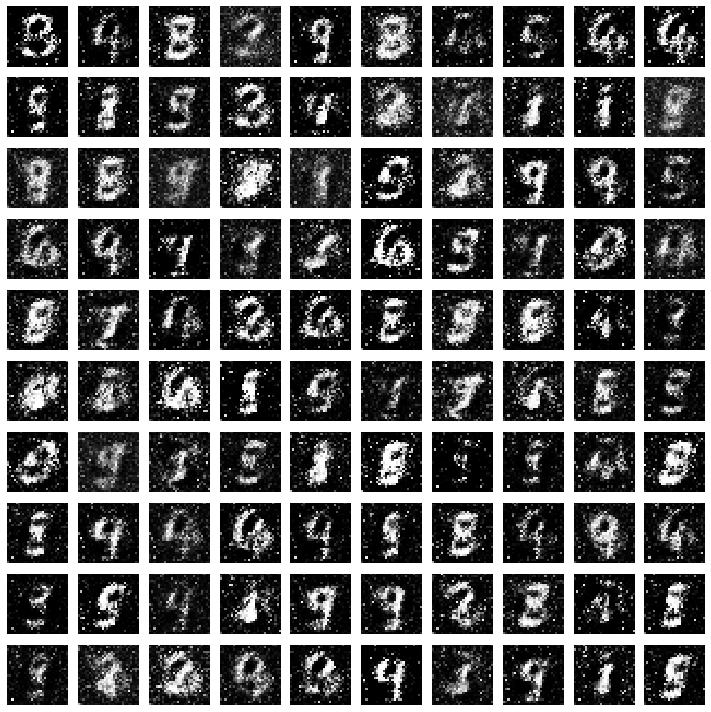

Epoch= 6 , Discriminator Loss= 0.5820, Generator Loss= 1.3086
Epoch= 7 , Discriminator Loss= 0.5831, Generator Loss= 1.2517
Epoch= 8 , Discriminator Loss= 0.5971, Generator Loss= 1.2005
Epoch= 9 , Discriminator Loss= 0.6179, Generator Loss= 1.1090
Epoch= 10 , Discriminator Loss= 0.6407, Generator Loss= 1.0578


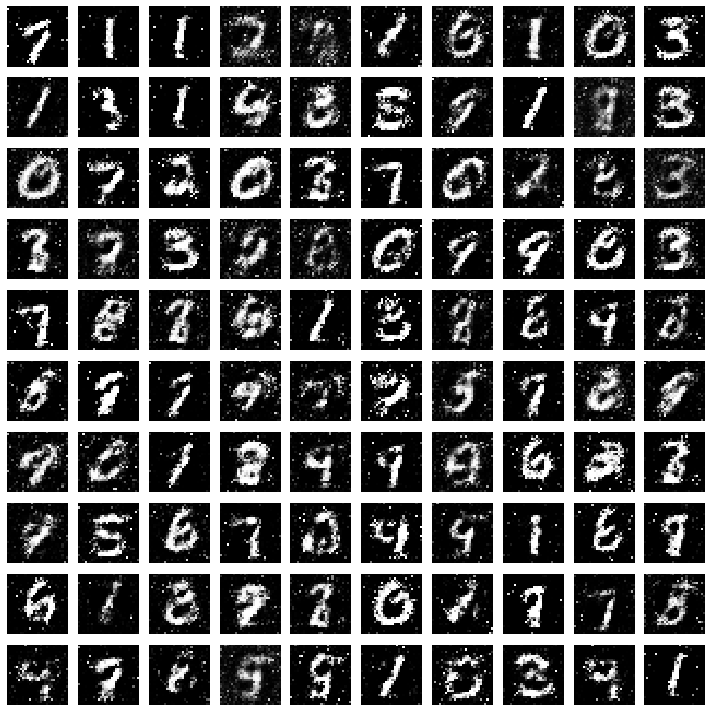

Epoch= 11 , Discriminator Loss= 0.6459, Generator Loss= 1.0170
Epoch= 12 , Discriminator Loss= 0.6414, Generator Loss= 1.0267
Epoch= 13 , Discriminator Loss= 0.6418, Generator Loss= 1.0302
Epoch= 14 , Discriminator Loss= 0.6455, Generator Loss= 1.0192
Epoch= 15 , Discriminator Loss= 0.6452, Generator Loss= 1.0194


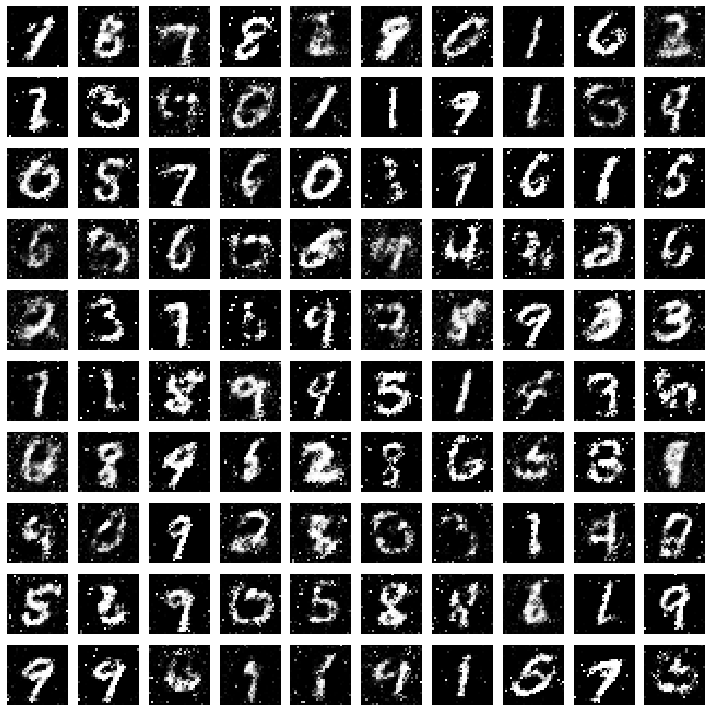

Epoch= 16 , Discriminator Loss= 0.6461, Generator Loss= 1.0110
Epoch= 17 , Discriminator Loss= 0.6475, Generator Loss= 1.0095
Epoch= 18 , Discriminator Loss= 0.6513, Generator Loss= 1.0046
Epoch= 19 , Discriminator Loss= 0.6534, Generator Loss= 1.0070
Epoch= 20 , Discriminator Loss= 0.6535, Generator Loss= 1.0018


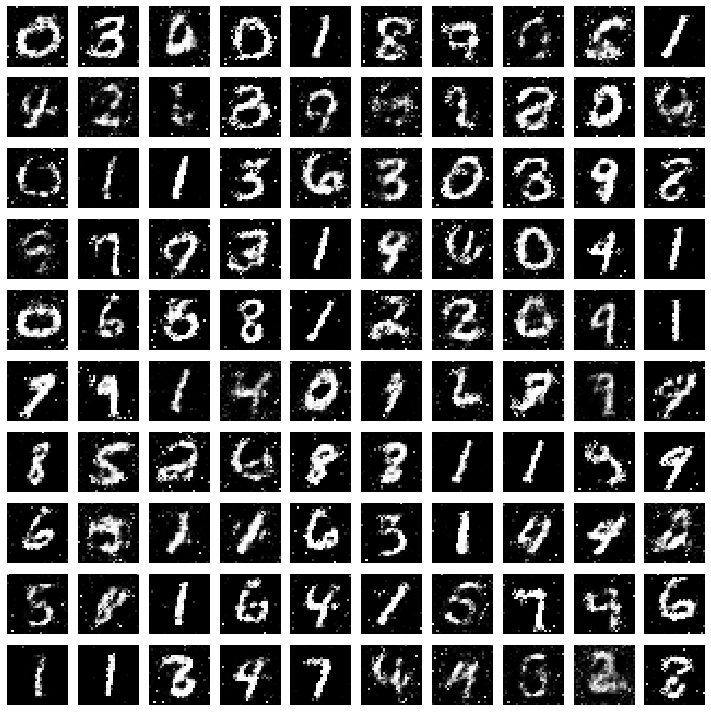

Epoch= 21 , Discriminator Loss= 0.6552, Generator Loss= 1.0001
Epoch= 22 , Discriminator Loss= 0.6573, Generator Loss= 0.9912
Epoch= 23 , Discriminator Loss= 0.6581, Generator Loss= 0.9944
Epoch= 24 , Discriminator Loss= 0.6589, Generator Loss= 0.9877
Epoch= 25 , Discriminator Loss= 0.6614, Generator Loss= 0.9888


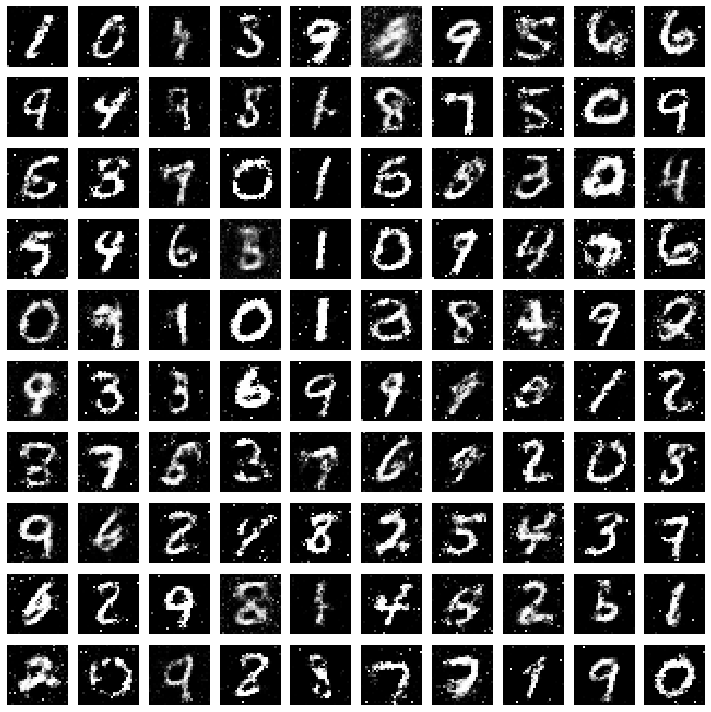

Epoch= 26 , Discriminator Loss= 0.6622, Generator Loss= 0.9885
Epoch= 27 , Discriminator Loss= 0.6640, Generator Loss= 0.9778
Epoch= 28 , Discriminator Loss= 0.6663, Generator Loss= 0.9757
Epoch= 29 , Discriminator Loss= 0.6670, Generator Loss= 0.9717
Epoch= 30 , Discriminator Loss= 0.6674, Generator Loss= 0.9748


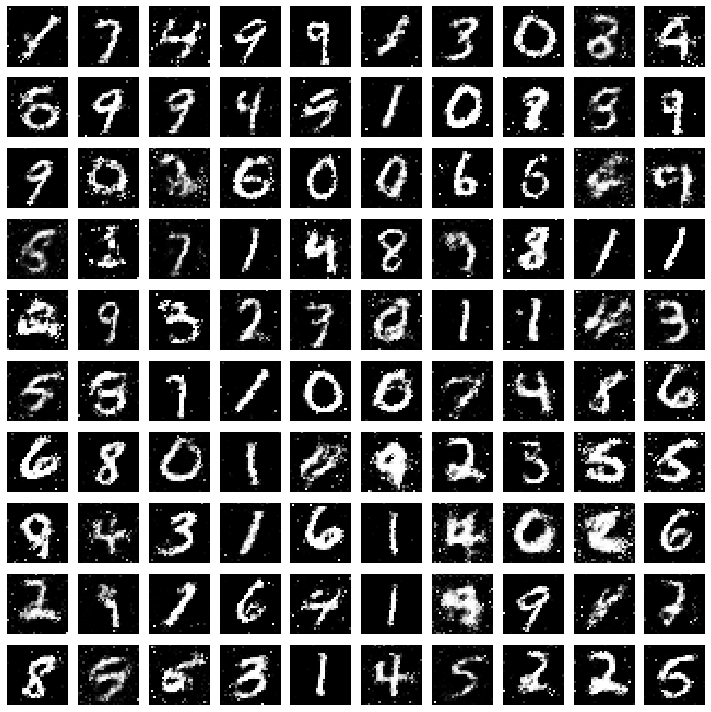

Epoch= 31 , Discriminator Loss= 0.6665, Generator Loss= 0.9746
Epoch= 32 , Discriminator Loss= 0.6685, Generator Loss= 0.9702
Epoch= 33 , Discriminator Loss= 0.6673, Generator Loss= 0.9683
Epoch= 34 , Discriminator Loss= 0.6683, Generator Loss= 0.9656
Epoch= 35 , Discriminator Loss= 0.6689, Generator Loss= 0.9690


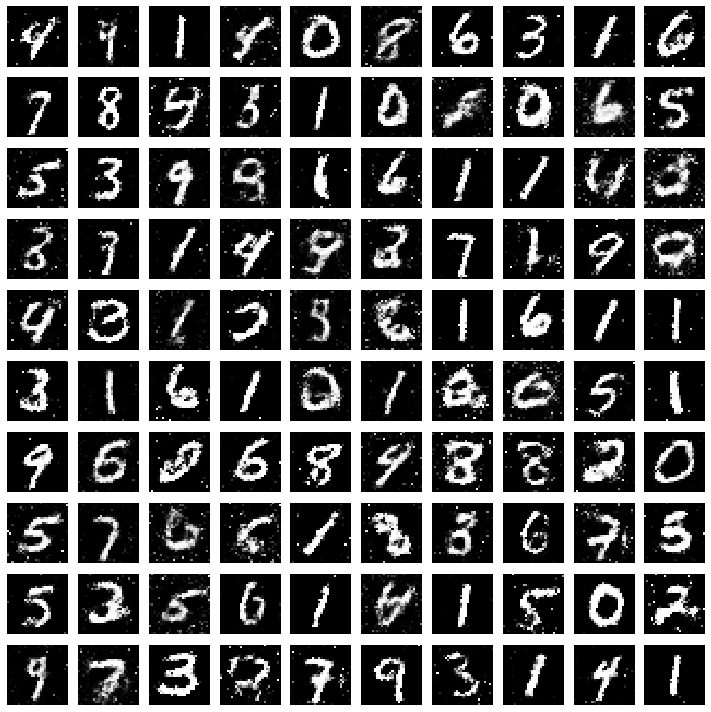

Epoch= 36 , Discriminator Loss= 0.6671, Generator Loss= 0.9696
Epoch= 37 , Discriminator Loss= 0.6688, Generator Loss= 0.9652
Epoch= 38 , Discriminator Loss= 0.6684, Generator Loss= 0.9660
Epoch= 39 , Discriminator Loss= 0.6698, Generator Loss= 0.9665
Epoch= 40 , Discriminator Loss= 0.6684, Generator Loss= 0.9693


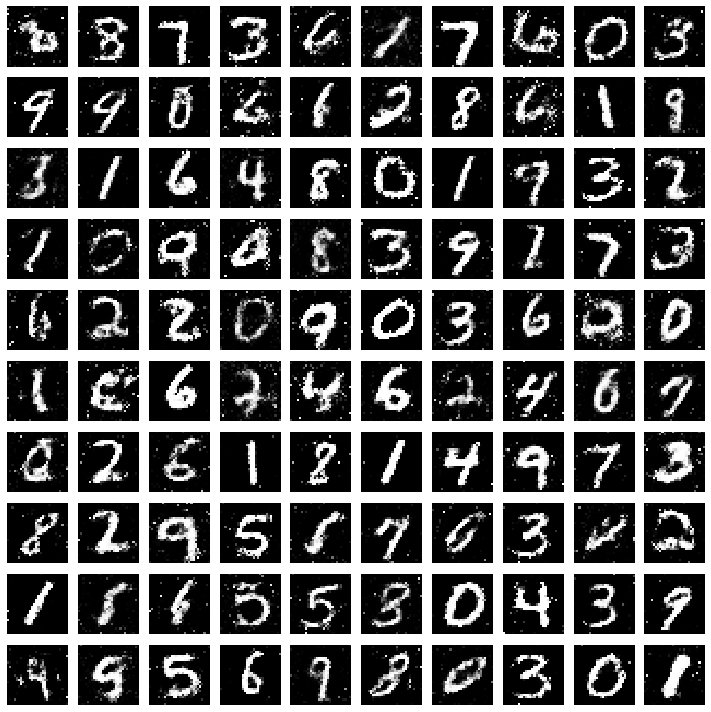

Epoch= 41 , Discriminator Loss= 0.6709, Generator Loss= 0.9629
Epoch= 42 , Discriminator Loss= 0.6698, Generator Loss= 0.9661
Epoch= 43 , Discriminator Loss= 0.6699, Generator Loss= 0.9657
Epoch= 44 , Discriminator Loss= 0.6697, Generator Loss= 0.9610
Epoch= 45 , Discriminator Loss= 0.6707, Generator Loss= 0.9631


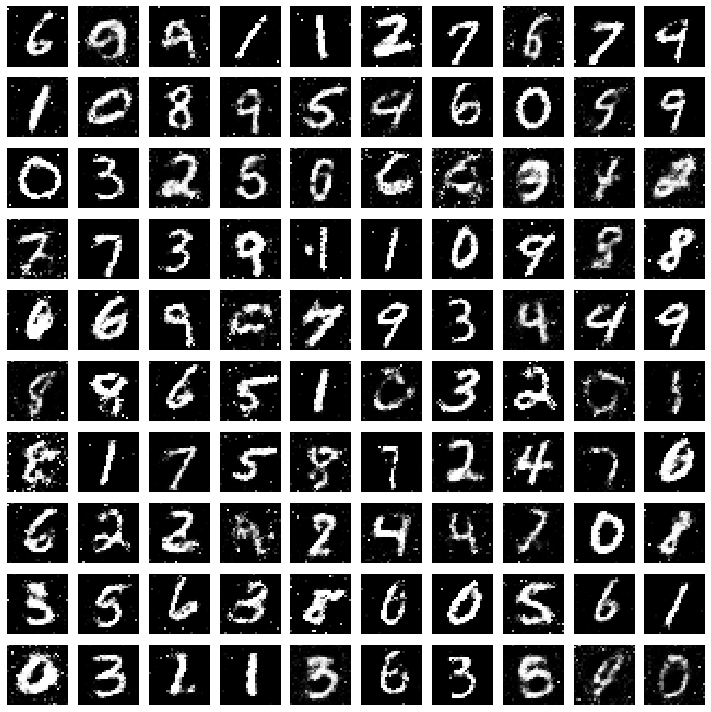

Epoch= 46 , Discriminator Loss= 0.6700, Generator Loss= 0.9640
Epoch= 47 , Discriminator Loss= 0.6705, Generator Loss= 0.9570
Epoch= 48 , Discriminator Loss= 0.6701, Generator Loss= 0.9623
Epoch= 49 , Discriminator Loss= 0.6712, Generator Loss= 0.9620
Epoch= 50 , Discriminator Loss= 0.6703, Generator Loss= 0.9646


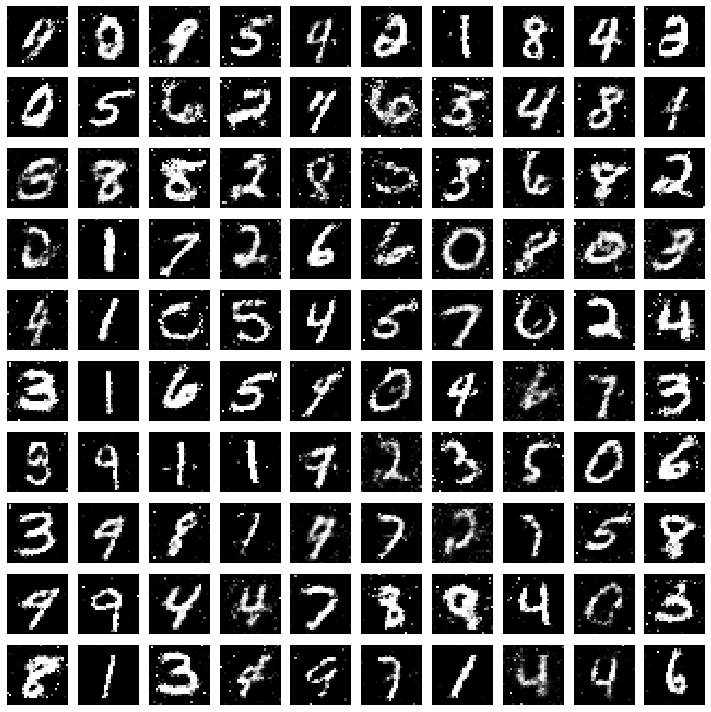

In [15]:
# Training Loop

d_losses = []
g_losses = []

for epoch in range(TOTAL_EPOCHS):
  epoch_d_loss = 0.
  epoch_g_loss = 0.

  # Mini batch SGD
  for step in range(NO_OF_BATCHES):

    # Step-3 Discriminator Training, generator frozen
    # 50% Real Data + 50% Fake Data

    # Real Data X
    idx = np.random.randint(0,X_Train.shape[0],HALF_BATCH)
    real_imgs = X_Train[idx]

    # Fake Data X
    noise = np.random.normal(0,1,size=(HALF_BATCH,NOISE_DIM))
    fake_imgs = generator.predict(noise) # Forward Pass only, no training - updating wts of generator

    # Labels
    real_y = np.ones((HALF_BATCH,1)) * 0.9
    fake_y = np.zeros((HALF_BATCH,1))

    # Train our Discriminator
    d_loss_real = discriminator.train_on_batch(real_imgs,real_y)
    d_loss_fake = discriminator.train_on_batch(fake_imgs,fake_y)
    d_loss = 0.5*d_loss_real + 0.5*d_loss_fake

    epoch_d_loss += d_loss

    # Train Generator (Considering Frozen Discriminator)
    noise = np.random.normal(0,1,size=(BATCH_SIZE,NOISE_DIM))
    ground_truth_y = np.ones((BATCH_SIZE,1))
    g_loss = model.train_on_batch(noise,ground_truth_y)
    epoch_g_loss += g_loss

  print("Epoch= %d , Discriminator Loss= %.4f, Generator Loss= %.4f"%((epoch+1),epoch_d_loss/NO_OF_BATCHES, epoch_g_loss/NO_OF_BATCHES))
  d_losses.append(epoch_d_loss/NO_OF_BATCHES)
  g_losses.append(epoch_g_loss/NO_OF_BATCHES)

  if (epoch+1)%5==0:
    generator.save('model/mnist_gan_generator_{}.h5'.format(epoch+1))
    save_images(epoch)

In [17]:
ls

 Volume in drive C is Windows
 Volume Serial Number is E23E-D7E3

 Directory of C:\Users\sinha\Desktop\Luicifer\Study\ML CB\MNIST GAN

25-04-2020  15:15    <DIR>          .
25-04-2020  15:15    <DIR>          ..
25-04-2020  14:49    <DIR>          .ipynb_checkpoints
25-04-2020  15:15    <DIR>          images
25-04-2020  15:15         1,472,949 MNIST_GAN.ipynb
25-04-2020  15:15    <DIR>          model
               1 File(s)      1,472,949 bytes
               5 Dir(s)  249,069,076,480 bytes free


In [93]:
#!zip -r /content/images.zip /content/images 

  adding: content/images/ (stored 0%)
  adding: content/images/gan_output_epoch_15.png (deflated 5%)
  adding: content/images/gan_output_epoch_50.png (deflated 6%)
  adding: content/images/gan_output_epoch_45.png (deflated 6%)
  adding: content/images/gan_output_epoch_10.png (deflated 4%)
  adding: content/images/gan_output_epoch_25.png (deflated 5%)
  adding: content/images/gan_output_epoch_35.png (deflated 6%)
  adding: content/images/gan_output_epoch_5.png (deflated 4%)
  adding: content/images/gan_output_epoch_40.png (deflated 6%)
  adding: content/images/gan_output_epoch_30.png (deflated 6%)
  adding: content/images/gan_output_epoch_20.png (deflated 5%)


In [0]:
#from google.colab import files
#files.download('images.zip')

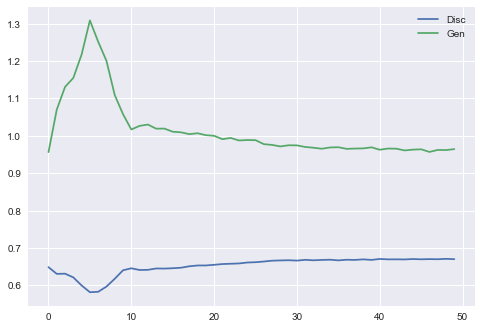

In [19]:
plt.plot(d_losses,label="Disc")
plt.plot(g_losses,label="Gen")
plt.legend()
plt.show()
